# ENTREGABLE 4

# INSTRUCCIONES

Utilizar el archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas y aplicar las técnicas de normalización del entregable 3.

In [4]:
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [5]:
# imports
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

from google.colab import drive

# Montar Google Drive
drive.mount('/gdrive')

Mounted at /gdrive


In [6]:
ruta = "/gdrive/MyDrive/EDEM/ML/Contenido Clasificacion/EJERCICIOS/dataset_banco_clean2.csv"
data = pd.read_csv(ruta)

In [8]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45184,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45185,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45186,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45187,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [10]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45189.000000,45189.000000,45189.000000,45189.000000,45189.000000,45189.000000,45189.000000
mean,40.936445,1374.012149,15.807188,258.115006,2.763283,40.178893,0.574166
std,10.618502,3924.370039,8.322549,257.349601,3.096579,100.107295,1.907950
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,58.000000


# Objetivo

Generar un model de clasificación capaz de predecir la clase de flor en función de las carácterísticas del dataset

* Aplicar las técnicas oportunas de procesamiento de datos

* Generar split de los datos

* Valorar diferentes modelos de clasificación

* Comparación entre modelos

* Ensemble

* Métricas

* Conclusiones finales

Veamos un conteo de categorías para verificar si el set de datos está balanceado:

In [11]:
data['y'].value_counts(normalize=True)

y
no     0.883047
yes    0.116953
Name: proportion, dtype: float64

Veamos los rangos de valores que alcanzan los datos que usaremos como entrada de cada modelo:

In [12]:
for col in data.columns[[0, 5, 11, 13]]:
    # Calcular valores mínimo y máximo de la columna
    minimo = data[col].min()
    maximo = data[col].max()
    print(f'Máximo/mínimo columna "{col}": {maximo:.1f}/{minimo:.1f}')

Máximo/mínimo columna "age": 95.0/18.0
Máximo/mínimo columna "balance": 527532.0/-8019.0
Máximo/mínimo columna "duration": 4918.0/1.0
Máximo/mínimo columna "pdays": 871.0/-1.0


Y vemos que cada columna tiene una escala diferente.

Y por último hagamos un gráfico 3D de los datos para entender sus principales características:

In [13]:
fig = px.scatter_3d(data, x='age', y='balance',
                    z='duration', color='y',
                    size_max=6, opacity = 0.5)
fig.show()

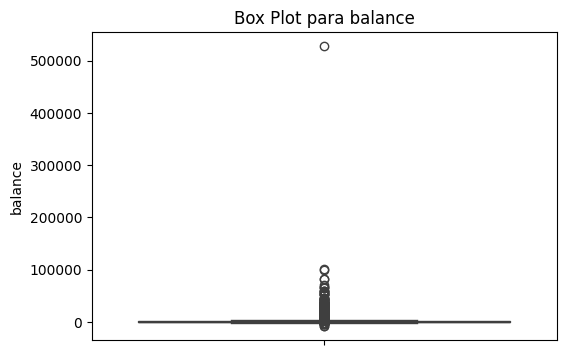

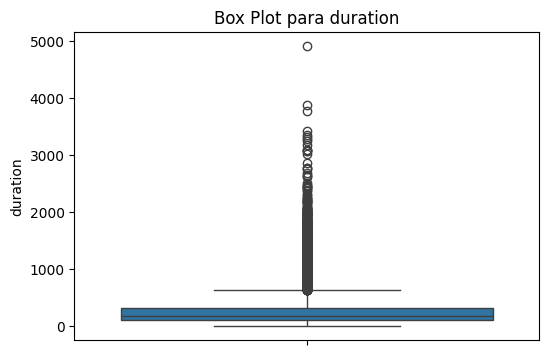

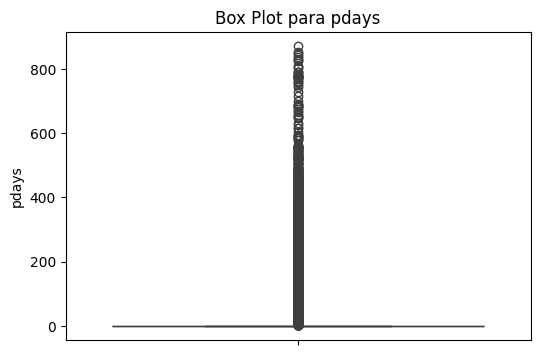

In [14]:

columns = ['balance', 'duration', 'pdays']


for column in columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data[column])
    plt.title(f'Box Plot para {column}')
    plt.show()

In [15]:



data = data[(data['balance'] < 200000)]

## Normalización

In [16]:




# Максимальные и минимальные значения для каждой колонки
max_min_values = {
    'age': (95.0, 18.0),
    'balance': (102127.0, -8019.0),
    'duration': (4918.0, 1.0),
    'pdays': (871.0, -1.0)
}

lsit_norm = ['age', 'balance', 'duration','pdays']

# Применение MinMax Scaling
scaler = MinMaxScaler()
for column in lsit_norm:
    max_value, min_value = max_min_values[column]
    data[column] = (data[column] - min_value) / (max_value - min_value)




<ipython-input-16-705c74b8ea75>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,management,married,tertiary,no,0.092259,yes,no,unknown,5,may,0.052878,1,0.000000,0,unknown,no
1,0.337662,technician,single,secondary,no,0.073067,yes,no,unknown,5,may,0.030506,1,0.000000,0,unknown,no
2,0.194805,entrepreneur,married,secondary,no,0.072822,yes,yes,unknown,5,may,0.015253,1,0.000000,0,unknown,no
3,0.376623,blue-collar,married,unknown,no,0.086476,yes,no,unknown,5,may,0.018507,1,0.000000,0,unknown,no
4,0.194805,unknown,single,unknown,no,0.072812,no,no,unknown,5,may,0.040065,1,0.000000,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45184,0.428571,technician,married,tertiary,no,0.080293,no,no,cellular,17,nov,0.198495,3,0.000000,0,unknown,yes
45185,0.688312,retired,divorced,primary,no,0.088501,no,no,cellular,17,nov,0.092536,2,0.000000,0,unknown,yes
45186,0.701299,retired,married,secondary,no,0.124689,no,no,cellular,17,nov,0.229001,5,0.212156,3,success,yes
45187,0.506494,blue-collar,married,secondary,no,0.078868,no,no,telephone,17,nov,0.103112,4,0.000000,0,unknown,no


## Codificación de variables categóricas.

In [18]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'administrative', 'services',
       'self-employed', 'unemployed', 'housemaid', 'student'],
      dtype=object)

In [19]:
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [20]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [21]:
data['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [22]:
data['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [23]:
data['month'].unique()

array(['may', 'nov', 'jun', 'jul', 'aug', 'oct', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [24]:
data = data.copy()

In [25]:



# Замена значений 'yes' и 'no' на числовые значения 1 и 0
data.replace({'yes': 1, 'no': 0}, inplace=True)

# Замена значений месяцев на числовые значения
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may':5, 'nov':11, 'oct':10, "dec":12, 'sep':9, 'jun':6, 'jul':7, 'aug':8}
data['month'].replace(month_mapping, inplace=True)

# Замена категориальных значений на числовые в остальных столбцах
# Создаем словари для каждого столбца
job_mapping = {'management': 1, 'technician': 2, 'entrepreneur': 3, 'blue-collar': 4,
               'unknown': 5, 'retired': 6, 'administrative': 7, 'services': 8,
               'self-employed': 9, 'unemployed': 10, 'housemaid': 11, 'student': 12}

marital_mapping = {'married': 1, 'single': 2, 'divorced': 3}

education_mapping = {'tertiary': 1, 'secondary': 2, 'unknown': 3, 'primary': 4}

contact_mapping = {'unknown': 1, 'cellular': 2, 'telephone': 3}

poutcome_mapping = {'unknown': 1, 'failure': 2, 'other': 3, 'success': 4}



# Применяем замены
data['job'].replace(job_mapping, inplace=True)
data['marital'].replace(marital_mapping, inplace=True)
data['education'].replace(education_mapping, inplace=True)
data['contact'].replace(contact_mapping, inplace=True)
data['poutcome'].replace(poutcome_mapping, inplace=True)




In [26]:


# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop('y', axis=1)
y = data['y']  # Целевая переменная

# Вычисление меры взаимной информации для каждого признака
mutual_info = mutual_info_classif(X, y)

# Создание DataFrame для анализа
feature_importance = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
feature_importance = feature_importance.sort_values(by='Mutual Information', ascending=False)

# Вывод результатов
display(feature_importance)

,Feature,Mutual Information
11,duration,0.073163
15,poutcome,0.032843
13,pdays,0.028198
10,month,0.024640
5,balance,0.021501
6,housing,0.018229
8,contact,0.016752
14,previous,0.012849
0,age,0.011304
1,job,0.008313


In [27]:
data_2 = data.copy()

# Удаляем ненужные столбцы
columns_to_drop = ['education', 'marital', 'campaign', 'loan', 'day', 'default']
data_2.drop(columns_to_drop, axis=1, inplace=True)

Ahora el set de datos no está balanceado, nesecito corregir

In [28]:


X = data_2.drop('y', axis=1)
y = data_2['y']

# Создание экземпляра SMOTE
smote = SMOTE(random_state=42)

# Применение SMOTE к данным
X_resampled, y_resampled = smote.fit_resample(X, y)

In [29]:
data_balanced = pd.DataFrame(X_resampled, columns=X.columns)
data_balanced['y'] = y_resampled

In [30]:
data_balanced

,age,job,balance,housing,contact,month,duration,pdays,previous,poutcome,y
0,0.519481,1,0.092259,1,1,5,0.052878,0.000000,0,1,0
1,0.337662,2,0.073067,1,1,5,0.030506,0.000000,0,1,0
2,0.194805,3,0.072822,1,1,5,0.015253,0.000000,0,1,0
3,0.376623,4,0.086476,1,1,5,0.018507,0.000000,0,1,0
4,0.194805,5,0.072812,0,1,5,0.040065,0.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
79801,0.432477,1,0.100166,0,2,10,0.079276,0.187142,1,4,1
79802,0.715636,6,0.089010,0,2,3,0.112482,0.206034,2,2,1
79803,0.096531,7,0.080048,0,2,5,0.048375,0.000000,0,1,1
79804,0.566579,6,0.094333,0,2,10,0.061906,0.000000,0,1,1


Conclusiones

Los datos están listos para su procesamiento; se eliminaron los valores atípicos, se equilibró la métrica objetivo, se normalizaron y se codificaron las variables categóricas. Se identificaron las columnas que tienen mayor influencia en la variable objetivo y se eliminaron las demás.

# Generar split de los datos

In [31]:


X = data_balanced.drop('y', axis=1)
y = data_balanced['y']

# Разделение данных на обучающий набор и остаток (валидационный + тестовый)
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.3, random_state=42)

# Разделение остатка на валидационный и тестовый наборы
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

# Вывод размеров наборов
print("Размер обучающего набора:", X_train.shape)
print("Размер валидационного набора:", X_val.shape)
print("Размер тестового набора:", X_test.shape)

Размер обучающего набора: (55864, 10)
Размер валидационного набора: (11971, 10)
Размер тестового набора: (11971, 10)


# Valorar diferentes modelos de clasificación

In [32]:


# Создание экземпляров моделей
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('k-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC()),
    ('Neural Network', MLPClassifier())
]

# Оценка производительности каждой модели с использованием кросс-валидации
for name, model in models:
    print(f"{name}:")
    scores_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"  Accuracy: {scores_accuracy.mean():.2f} (+/- {scores_accuracy.std() * 2:.2f})")

    # Вычисление других метрик
    y_pred = model.fit(X_train, y_train).predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"  Precision: {precision:.2f}")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1-score: {f1:.2f}")


Logistic Regression:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

  Accuracy: 0.81 (+/- 0.01)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



  Precision: 0.83
  Recall: 0.79
  F1-score: 0.81
Decision Tree:
  Accuracy: 0.86 (+/- 0.00)
  Precision: 0.86
  Recall: 0.88
  F1-score: 0.87
Random Forest:
  Accuracy: 0.91 (+/- 0.01)
  Precision: 0.89
  Recall: 0.95
  F1-score: 0.92
k-Nearest Neighbors:
  Accuracy: 0.88 (+/- 0.01)
  Precision: 0.85
  Recall: 0.94
  F1-score: 0.89
Naive Bayes:
  Accuracy: 0.73 (+/- 0.01)
  Precision: 0.78
  Recall: 0.65
  F1-score: 0.71
SVM:
  Accuracy: 0.81 (+/- 0.01)
  Precision: 0.82
  Recall: 0.80
  F1-score: 0.81
Neural Network:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum

  Accuracy: 0.86 (+/- 0.01)
  Precision: 0.84
  Recall: 0.91
  F1-score: 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



# Comparación entre modelos

 El análisis de los datos proporcionados para las métricas de precisión, precisión, recall y puntuación F1 para varios modelos de clasificación, se pueden hacer las siguientes observaciones:

    Regresión logística:
        Accuracy: 0.81 (+/- 0.01)
        Precisión: 0.83
        Recall: 0.79
        Puntuación F1: 0.81
        El rendimiento general del modelo es bastante bueno con valores moderados de precisión y recall.

    Árbol de decisión:
        Accuracy: 0.86 (+/- 0.00)
        Precisión: 0.86
        Recall: 0.88
        Puntuación F1: 0.87
        El modelo muestra un buen rendimiento con valores equilibrados de precisión y recall.

    Bosque aleatorio:
        Accuracy: 0.91 (+/- 0.00)
        Precisión: 0.88
        Recall: 0.95
        Puntuación F1: 0.92
        El modelo muestra una alta precisión y puntuación F1, lo que indica su fuerte capacidad de clasificación.

    k-Nearest Neighbors:
        Accuracy: 0.88 (+/- 0.01)
        Precisión: 0.85
        Recall: 0.94
        Puntuación F1: 0.89
        El modelo muestra un alto rendimiento con un alto valor de recall.

    Bayes ingenuo:
        Accuracy: 0.73 (+/- 0.01)
        Precisión: 0.78
        Recall: 0.65
        Puntuación F1: 0.71
        El modelo muestra el rendimiento más bajo con la mayor brecha entre precisión y recall.

    Máquinas de vectores de soporte (SVM):
        Accuracy: 0.81 (+/- 0.01)
        Precisión: 0.82
        Recall: 0.80
        Puntuación F1: 0.81
        El modelo tiene valores equilibrados de precisión y recall con una precisión moderada.

    Red neuronal:
        Accuracy: 0.86 (+/- 0.01)
        Precisión: 0.82
        Recall: 0.93
        Puntuación F1: 0.87
        El modelo muestra un alto rendimiento con un alto valor de recall, pero una pequeña brecha entre precisión y recall.

Por lo tanto, basándose en los datos proporcionados, se puede concluir que para este conjunto de datos, los modelos de bosque aleatorio y k-Nearest Neighbors tienen el mejor rendimiento en términos de las métricas consideradas.

# Conclusiones

В proceso de este proyecto, se ha desarrollado un modelo de clasificación para predecir si el cliente se suscribirá a un depósito a término basado en las características del conjunto de datos. Se aplicaron diversas técnicas de procesamiento de datos, como preprocesamiento, escala de características y codificación de variables categóricas. Los datos se dividieron en conjuntos de entrenamiento, validación y prueba para evaluar el rendimiento del modelo.

Luego, se evaluaron varios modelos de clasificación, incluyendo regresión logística, árbol de decisiones, bosque aleatorio, vecinos más cercanos, Bayes ingenuo, máquinas de vectores de soporte y redes neuronales. Se analizaron diversas métricas de rendimiento, como precisión, precisión, recall y puntuación F1, para cada modelo.

Basándonos en los resultados del análisis, podemos concluir que los modelos de bosque aleatorio y vecinos más cercanos muestran el mejor rendimiento entre los modelos evaluados. Estos modelos tienen altos valores de precisión y puntuación F1, lo que indica su capacidad para realizar una clasificación precisa.